## EDA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:

# Load the dataset
course_data = pd.read_csv("https://raw.githubusercontent.com/priya-chaudhuri/schulich_data_science/refs/heads/main/Data%20Science%20II/Course%20List.csv")

# Display the first few rows to understand the structure of the dataset
course_data.head()


,Area,Course Name,Term,Programme,Professor,Rating,Credits,Course Description
0,ACTG,FINANCIAL ACCOUNTING FOR MANAGERS,F2,"MBA, MMgt",Linda Thorne,4,3.0,This course examines the assumptions and decis...
1,ACTG,FINANCIAL DECISIONS FOR MANAGERS,F2,"MMgt, MHIA",Supinder Babra,3,3.0,This course will provide students with an unde...
2,ACTG,MANAGEMENT ACCOUNTING,F2,"MBA,MBAN",Sandy Qu,3,1.5,This course provides an introduction to manage...
3,ACTG,INTERMEDIATE FINANCIAL ACCOUNTING I,F2,MBA,Richa Khanna,5,3.0,Examines the accounting concepts and principle...
4,ACTG,INTERMEDIATE FINANCIAL ACCOUNTING FOR FINANCE ...,F2,MFIN,John Bogdan,5,3.0,This course is meant specifically for non-acco...


In [3]:
# Overwrite the original variable with the transformed data
#course_data = course_data.assign(Programme=course_data['Programme'].str.split(',')).explode('Programme')

# Strip any extra whitespace from the 'Programme' column
#course_data['Programme'] = course_data['Programme'].str.strip()

# Display the updated data to confirm changes
#course_data.head()


In [4]:
# Check for missing values and data types
missing_values = course_data.isnull().sum()
data_types = course_data.dtypes

# Summary statistics for numerical columns
numerical_summary = course_data.describe()

# Unique values for categorical columns
unique_values = {col: course_data[col].nunique() for col in course_data.select_dtypes(include='object').columns}

# Results
missing_values, data_types, numerical_summary, unique_values


(Area                  0
 Course Name           0
 Term                  0
 Programme             0
 Professor             0
 Rating                0
 Credits               0
 Course Description    0
 dtype: int64,
 Area                   object
 Course Name            object
 Term                   object
 Programme              object
 Professor              object
 Rating                  int64
 Credits               float64
 Course Description     object
 dtype: object,
            Rating    Credits
 count  150.000000  150.00000
 mean     3.993333    2.94000
 std      0.847394    0.67037
 min      3.000000    1.50000
 25%      3.000000    3.00000
 50%      4.000000    3.00000
 75%      5.000000    3.00000
 max      5.000000    6.00000,
 {'Area': 12,
  'Course Name': 111,
  'Term': 3,
  'Programme': 30,
  'Professor': 81,
  'Course Description': 111})

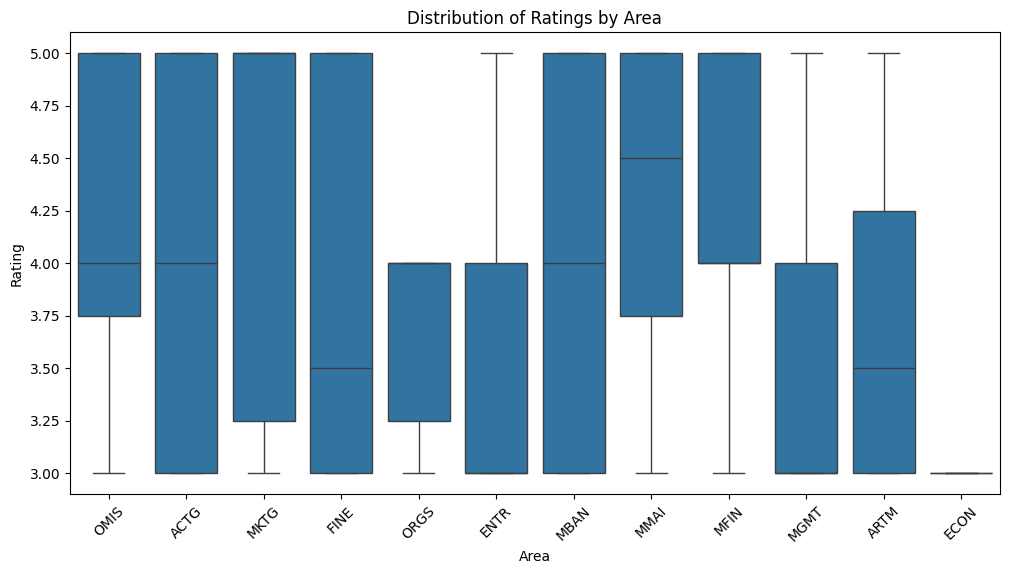

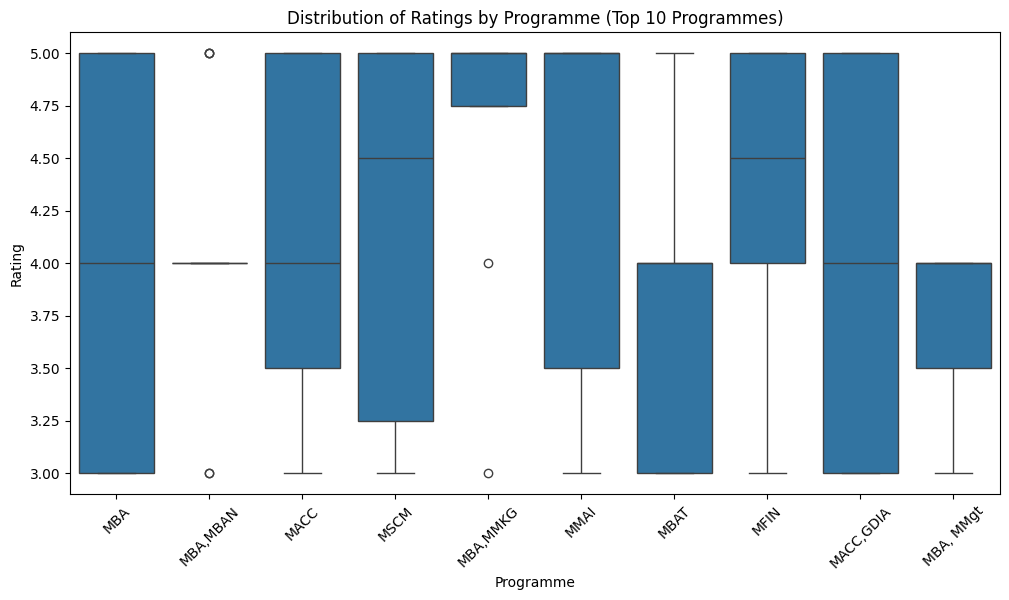

In [5]:

# Distribution of ratings by Area
plt.figure(figsize=(12, 6))
sns.boxplot(x='Area', y='Rating', data=course_data, order=course_data['Area'].value_counts().index)
plt.title('Distribution of Ratings by Area')
plt.xlabel('Area')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

# Distribution of ratings by Programme (Top 10 Programmes by Frequency)
top_programmes = course_data['Programme'].value_counts().head(10).index
filtered_data = course_data[course_data['Programme'].isin(top_programmes)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Programme', y='Rating', data=filtered_data, order=top_programmes)
plt.title('Distribution of Ratings by Programme (Top 10 Programmes)')
plt.xlabel('Programme')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()


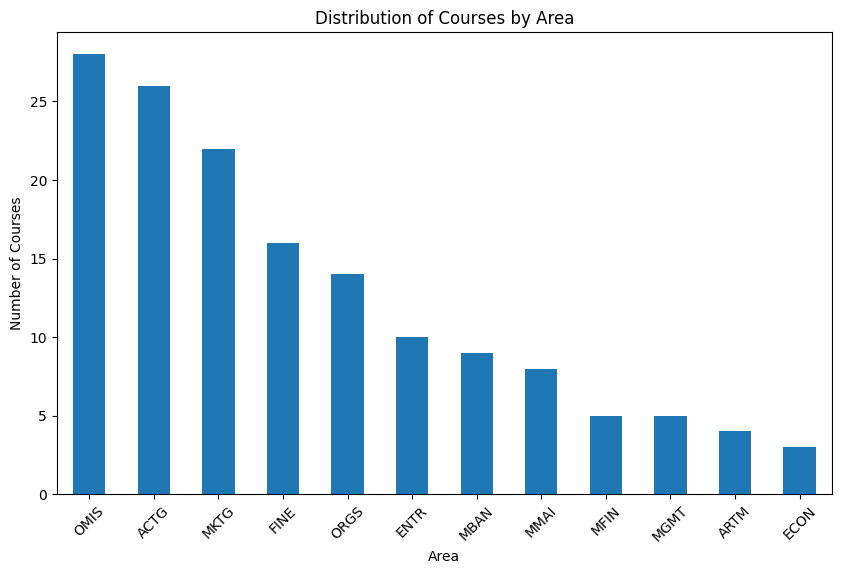

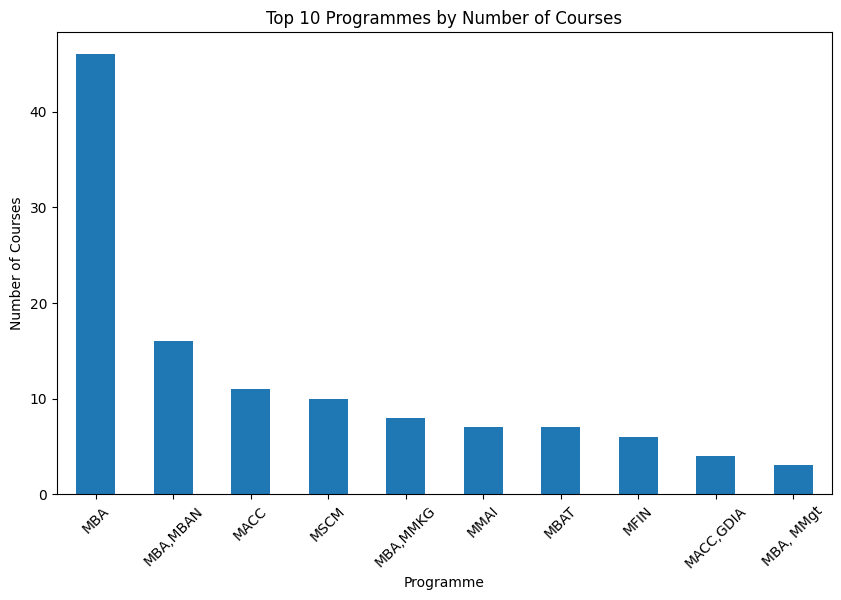

In [6]:
# Distribution of courses by Area
area_counts = course_data['Area'].value_counts()

# Distribution of courses by Programme (top 10 most frequent)
programme_counts = course_data['Programme'].value_counts().head(10)

# Plot distribution of courses by Area
plt.figure(figsize=(10, 6))
area_counts.plot(kind='bar', title='Distribution of Courses by Area', xlabel='Area', ylabel='Number of Courses')
plt.xticks(rotation=45)
plt.show()

# Plot distribution of courses by Programme (top 10)
plt.figure(figsize=(10, 6))
programme_counts.plot(kind='bar', title='Top 10 Programmes by Number of Courses', xlabel='Programme', ylabel='Number of Courses')
plt.xticks(rotation=45)
plt.show()


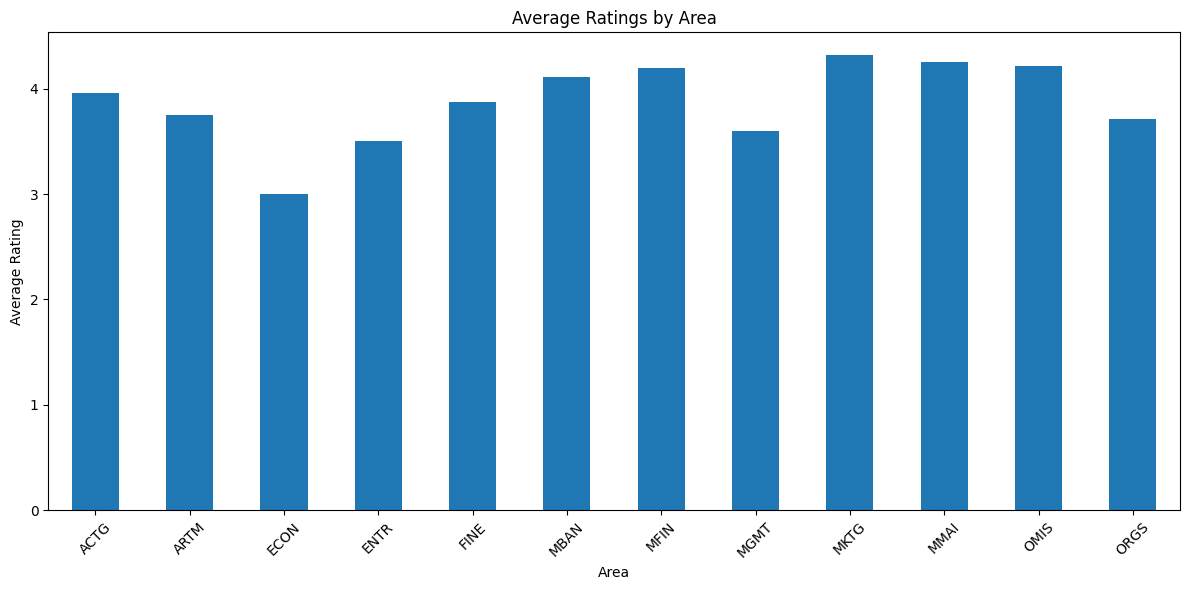

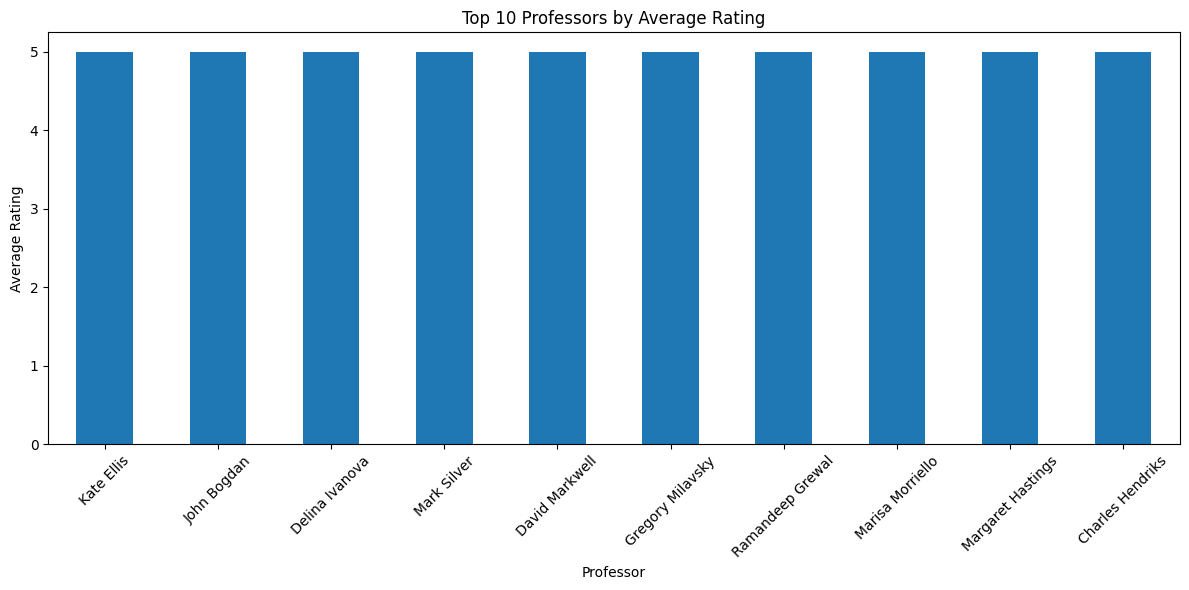

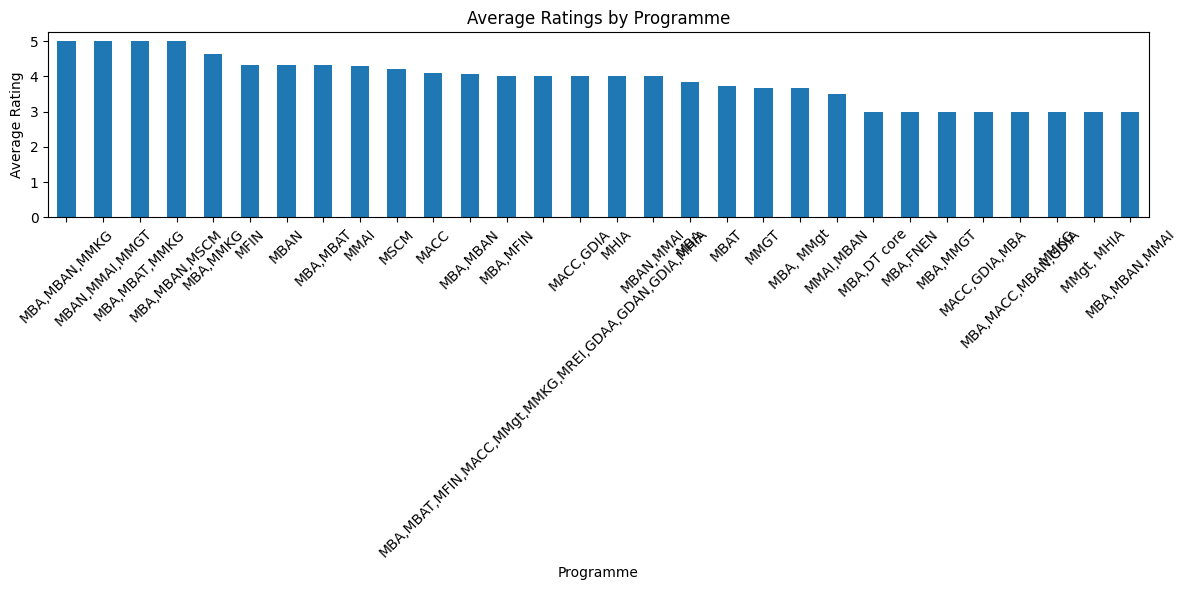

,Rating,Credits
Rating,1.000000,-0.018431
Credits,-0.018431,1.000000


In [7]:
# Ratings analysis: Variation of ratings across areas, professors, and programs

# Average ratings by Area
ratings_by_area = course_data.groupby('Area')['Rating'].mean()

# Average ratings by Professor (top 10 rated professors)
ratings_by_professor = course_data.groupby('Professor')['Rating'].mean().sort_values(ascending=False).head(10)

# Average ratings by Programme
ratings_by_programme = course_data.groupby('Programme')['Rating'].mean()

# Correlation check: Relationships between Credits, Ratings, and Course Areas
correlation_matrix = course_data[['Rating', 'Credits']].corr()

# Visualize average ratings by Area
plt.figure(figsize=(12, 6))
ratings_by_area.plot(kind='bar', title='Average Ratings by Area', ylabel='Average Rating', xlabel='Area')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize top 10 professors by rating
plt.figure(figsize=(12, 6))
ratings_by_professor.plot(kind='bar', title='Top 10 Professors by Average Rating', ylabel='Average Rating', xlabel='Professor')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize average ratings by Programme
plt.figure(figsize=(12, 6))
ratings_by_programme.sort_values(ascending=False).plot(kind='bar', title='Average Ratings by Programme', ylabel='Average Rating', xlabel='Programme')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the correlation matrix
correlation_matrix


Theres a very weak(no) relationship between Rating and Credits.
MKTG Area has the highest average rating.

## Pre-Processing

In [8]:
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np

In [9]:
# Check for null values
if course_data['Course Description'].isnull().any():
    course_data['Course Description'] = course_data['Course Description'].fillna('')


In [10]:
# Standardizing Course name
course_data['Course Name'] = course_data['Course Name'].str.upper()

In [11]:
# Preprocessing
# 1. Vectorize the 'Course Description' using TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(course_data['Course Description'])


In [12]:
# 2. One-hot encode categorical features: 'Area', 'Programme', and 'Course Name'
encoder = OneHotEncoder()
categorical_features = encoder.fit_transform(course_data[['Area', 'Programme', 'Course Name']])

In [13]:
# 3. Normalize numerical features: 'Credits'
scaler = MinMaxScaler()
numerical_features = scaler.fit_transform(course_data[['Credits']])

In [14]:
# Combine all feature vectors into a single matrix
from scipy.sparse import hstack

combined_features = hstack([
    tfidf_matrix, 
    categorical_features, 
    np.array(numerical_features)
])

## Building Recommendation System

In [15]:
#Compute pairwise cosine similarity
similarity_matrix = cosine_similarity(combined_features, dense_output=False)

In [16]:
# Define helper function to get course index from course name
def get_course_index(course_name):
    """
    Returns the index of the course based on the course name.
    Args:
        course_name (str): Name of the course.
    Returns:
        int: Index of the course, or None if the course name is not found.
    """
    course_name = course_name.upper()  # Ensure case-insensitive matching
    try:
        return course_data[course_data['Course Name'] == course_name].index[0]
    except IndexError:
        return None

In [17]:
# Define recommendation function

def recommend_courses(course_name=None, course_index=None, top_n=5):
    """
    Recommends top_n courses similar to the course at the specified index or name.

    Args:
        course_name (str): Name of the course to base recommendations on.
        course_index (int): Index of the course to base recommendations on.
        top_n (int): Number of courses to recommend.

    Returns:
        pd.DataFrame: Top N recommended courses with similarity scores and course descriptions.
    """
    # Handle course name or index input
    if course_name is not None:
        course_index = get_course_index(course_name)
    if course_index is None or course_index >= len(course_data):
        return "Course not found. Please provide a valid course name or index."

    # Compute similarity scores for the given course
    similarity_scores = similarity_matrix[course_index]

    # Convert sparse array to dense if needed
    if not isinstance(similarity_scores, np.ndarray):
        similarity_scores = similarity_scores.toarray().flatten()

    # Sort courses by similarity scores, excluding the selected course itself
    top_indices = np.argsort(similarity_scores)[::-1][1:top_n + 1]

    # Select the recommended courses and include course descriptions
    recommendations = course_data.iloc[top_indices].copy()
    recommendations['Similarity Score'] = similarity_scores[top_indices]

    # Return the top N recommendations
    return recommendations[['Course Name', 'Course Description','Term', 'Area', 'Programme', 'Credits', 'Similarity Score']]


## DEMO

In [18]:
# Example: Recommend courses based on the first course
recommended_courses = recommend_courses(course_name="DATA SCIENCE I", top_n=5)
print("Recommended Courses:")
recommended_courses

# To test the recommendations for another course: replace `course_name= xyz course name` and change top_n= as per number of ideal recommendations

Recommended Courses:


,Course Name,Course Description,Term,Area,Programme,Credits,Similarity Score
24,PREDICTIVE MODELLING,This course provides the tools needed to build...,F2,MBAN,"MBAN,MMAI",3.0,0.553240
26,DATA SCIENCE II,This course is designed for business students ...,F2,MBAN,MBAN,3.0,0.351809
74,VISUAL ANALYTICS & MODELLING,This course is an introduction to the fundamen...,W2,MBAN,MMAI,3.0,0.330886
25,VISUAL ANALYTICS & MODELLING,This course is an introduction to the fundamen...,F2,MBAN,"MBA,MBAN",3.0,0.330886
28,ANALYTICS CONSULTING PROJECT,The Analytics Consulting Project is the capsto...,F2,MBAN,MBAN,6.0,0.316212


In [19]:
# Example: Recommend courses based on the first course
recommended_courses = recommend_courses(course_name="DATA SCIENCE I", top_n=10)
print("Recommended Courses:")
recommended_courses


Recommended Courses:


,Course Name,Course Description,Term,Area,Programme,Credits,Similarity Score
24,PREDICTIVE MODELLING,This course provides the tools needed to build...,F2,MBAN,"MBAN,MMAI",3.0,0.553240
26,DATA SCIENCE II,This course is designed for business students ...,F2,MBAN,MBAN,3.0,0.351809
74,VISUAL ANALYTICS & MODELLING,This course is an introduction to the fundamen...,W2,MBAN,MMAI,3.0,0.330886
25,VISUAL ANALYTICS & MODELLING,This course is an introduction to the fundamen...,F2,MBAN,"MBA,MBAN",3.0,0.330886
28,ANALYTICS CONSULTING PROJECT,The Analytics Consulting Project is the capsto...,F2,MBAN,MBAN,6.0,0.316212
27,REALIZING VALUE FROM AI AND ANALYTICS IN ORGAN...,This course provides a practical grounding in ...,F2,MBAN,MBA,3.0,0.304283
124,REALIZING VALUE FROM AI AND ANALYTICS IN ORGAN...,This course provides a practical grounding in ...,SU,MBAN,"MBA,MBAT",3.0,0.304283
75,ARTIFICIAL INTELLIGENCE IN BUSINESS I,Students are introduced to the field of artifi...,W2,MBAN,MBA,3.0,0.279238
36,AI CONSULTING PROJECT,"The AI Consulting Project is an intensive, 2-t...",F2,MMAI,MMAI,6.0,0.090991
130,VENTURE STUDIO THE ACCELERATION MISSION,This Work Integrated Learning Course (class + ...,SU,MGMT,MBAT,6.0,0.085860


In [20]:
# Example: Recommend courses based on the first course
recommended_courses = recommend_courses(course_name="ARTIFICIAL INTELLIGENCE FUNDAMENTALS", top_n=10)
print("Recommended Courses:")
recommended_courses


Recommended Courses:


,Course Name,Course Description,Term,Area,Programme,Credits,Similarity Score
143,DATABASE FUNDAMENTALS,Database Management Systems are computer-based...,SU,MMAI,"MMAI,MBAN",3.0,0.526986
36,AI CONSULTING PROJECT,"The AI Consulting Project is an intensive, 2-t...",F2,MMAI,MMAI,6.0,0.336789
87,BUSINESS APPLICATIONS OF AI II,This course bridges the theoretical foundation...,W2,MMAI,MMAI,3.0,0.335302
33,BUSINESS APPLICATIONS OF AI I,This course focuses on understanding the oppor...,F2,MMAI,MMAI,3.0,0.307739
35,APPLICATIONS OF DEEP LEARNING IN BUSINESS,"Deep learning systems, embodied by a variety o...",F2,MMAI,MMAI,3.0,0.300739
34,NATURAL LANGUAGE PROCESSING,This course focuses on the principles and tech...,F2,MMAI,MMAI,3.0,0.297449
88,ALGORITHMS FOR BUSINESS ANALYSIS,The course covers main approaches to design an...,W2,MMAI,MMAI,3.0,0.281850
75,ARTIFICIAL INTELLIGENCE IN BUSINESS I,Students are introduced to the field of artifi...,W2,MBAN,MBA,3.0,0.211167
49,EMPOWERING BUSINESS GROWTH - EXPLORING ARTIFIC...,This comprehensive course offers a deep dive i...,F2,OMIS,"MBA,MBAT,MFIN,MACC,MMgt,MMKG,MREI,GDAA,GDAN,GD...",3.0,0.087726
130,VENTURE STUDIO THE ACCELERATION MISSION,This Work Integrated Learning Course (class + ...,SU,MGMT,MBAT,6.0,0.084789
